### Calculation of coherent elastic neutrino-electron scattering E$\nu$ES

In this notebook we outline how to generate E$\nu$ES rate. First we show how to do it for the SM and then for non-zero NSI parameters. 

In [2]:
import numpy as np


In [1]:
from snudd import config
from snudd.targets import Electron # the elctron target class object
from snudd.binding import binding_xe # dataclass of binding energy data for xenon
from snudd.rrpa import rrpa_scaling # ad-hoc rrpa scaling for bound electron
from snudd.models import GeneralNSI

In [3]:
from snudd.targets import Nucleus # Still need a nucleus to be declared


In [4]:
Xe_nucleus = Nucleus(54, 132, mass=131.9041535 * config.u) # only do one isotope for this example 

In [5]:
SM_matrix = np.array([[0, 0, 0],
                       [0, 0.0, 0],
                       [0, 0, 0.0]])

SM_eta = 0
SM_phi = 0

sm_model = GeneralNSI(SM_matrix, SM_eta, SM_phi)

In [6]:
Xe_electron = Electron(Xe_nucleus, binding_xe, rrpa_scaling) 
Xe_electron.update_model(sm_model)
Xe_electron.prepare_density()

In [7]:
E_Rs = np.logspace(-2, 2, 1000) / 1e6  # Recoil Energy in GeV


In [8]:
sm_spec = Xe_electron.spectrum(E_Rs) 

In [9]:
import matplotlib.pyplot as plt

(0.5, 5.0)

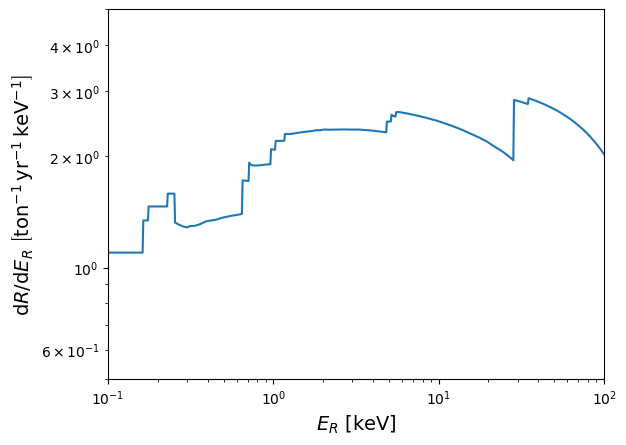

In [10]:
plt.loglog(E_Rs*1e6, abs(sm_spec))

plt.ylabel(r'${\rm d}R/{\rm d}E_R\,\,\left[{\rm ton}^{-1}\,{\rm yr}^{-1}\,{\rm keV}^{-1}\right]$', size=14)
plt.xlabel(r'$E_{R}\,\,\left[{\rm keV}\right]$', size=14)

plt.xlim(xmin=1e-1, xmax=1e2)
plt.ylim(ymax=5e0, ymin=5e-1)

Now calculate rate for a NSI parameter

In [11]:
NSI_matrix = np.array([[0, 0.1, 0],
                       [0.1, 0.0, 0.0],
                       [0, 0.0, 0.0]])

NSI_eta = 0.0
NSI_phi = -np.pi/2

NSI_model = GeneralNSI(NSI_matrix, NSI_eta, NSI_phi)

In [12]:
Xe_electron = Electron(Xe_nucleus, binding_xe, rrpa_scaling)
Xe_electron.update_model(NSI_model)
Xe_electron.prepare_density()

In [13]:
NSI_spec = Xe_electron.spectrum(E_Rs)

(0.5, 5.0)

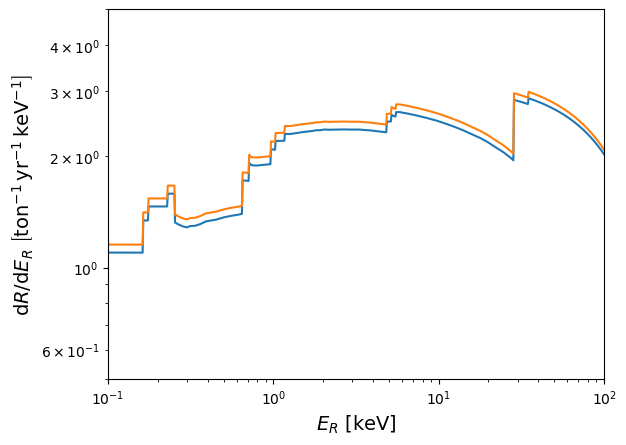

In [14]:
plt.loglog(E_Rs*1e6, abs(sm_spec))

plt.loglog(E_Rs*1e6, abs(NSI_spec))

plt.ylabel(r'${\rm d}R/{\rm d}E_R\,\,\left[{\rm ton}^{-1}\,{\rm yr}^{-1}\,{\rm keV}^{-1}\right]$', size=14)
plt.xlabel(r'$E_{R}\,\,\left[{\rm keV}\right]$', size=14)

plt.xlim(xmin=1e-1, xmax=1e2)
plt.ylim(ymax=5e0, ymin=5e-1)